<a href="https://colab.research.google.com/github/1Nine2/Parcial2_IA/blob/main/SegundoParcial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Segundo Parcial

**Nombre: Micaela Jhoselin Saenz Molina**



---


**C.I.:8464832**





*1. Generar una red neuronal (sin librerias) que utilice el daatset iris con producto punto, errores, y de dos capas.*

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

in_dir = 'drive/MyDrive/IA_Inf/'

in_file = 'Iris.csv'

df = pd.read_csv(in_dir+in_file)
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.model_selection import train_test_split

%matplotlib inline

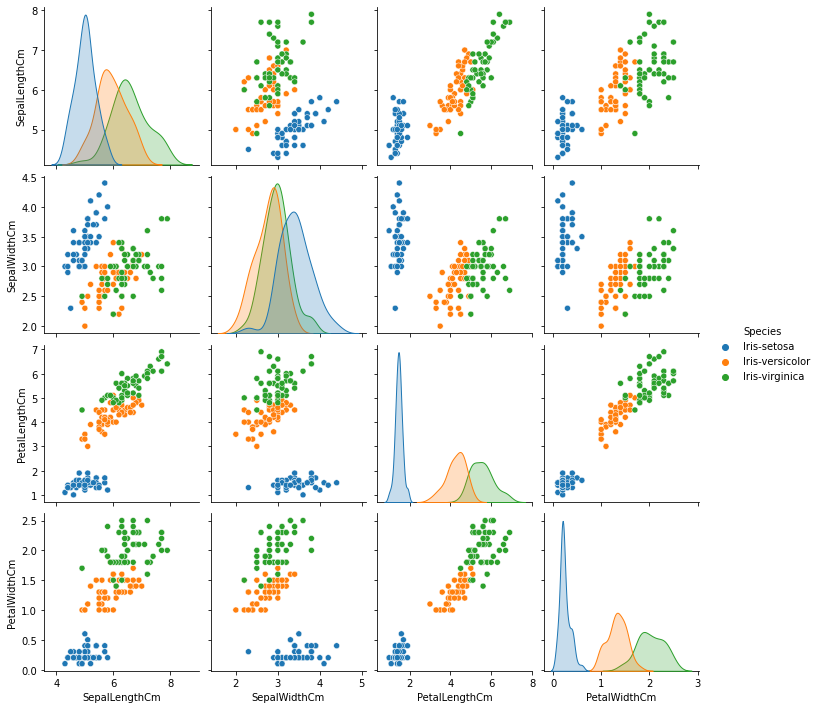

In [ ]:
 g = sns.pairplot(df.drop("Id", axis=1), hue="Species")

In [ ]:
#Convertiendo
def to_one_hot(Y):
    n_col = np.amax(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1.
    return binarized

In [ ]:
def from_one_hot(Y):
    arr = np.zeros((len(Y), 1))

    for i in range(len(Y)):
        l = layer2[i]
        for j in range(len(l)):
            if(l[j] == 1):
                arr[i] = j+1
    return arr

In [ ]:
#sigmoid y derivada
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_deriv(x):
    return sigmoid(x)*(1 - sigmoid(x))

#Normalizando
def normalize(X, axis=-1, order=2):
    l2 = np.atleast_1d(np.linalg.norm(X, order, axis))
    l2[l2 == 0] = 1
    return X / np.expand_dims(l2, axis)

In [ ]:
#Limpiando los datos
df['Species'].replace(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], [0, 1, 2], inplace=True)

columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
x = pd.DataFrame(df, columns=columns)
x = normalize(x.values)

columns = ['Species']
y = pd.DataFrame(df, columns=columns)
y = y.values
y = y.flatten()
y = to_one_hot(y)

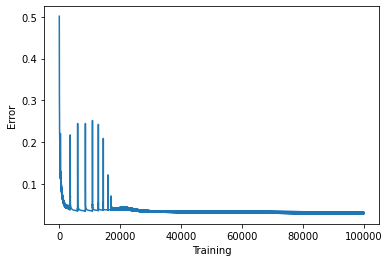

Precision 97.14%


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)
    
#Weights
w0 = 2*np.random.random((4, 5)) - 1 #for input   - 4 inputs, 3 outputs
w1 = 2*np.random.random((5, 3)) - 1 #for layer 1 - 5 inputs, 3 outputs

#learning rate
n = 0.1

#Errors - for graph later
errors = []

#Train
for i in range(100000):

    #Feed forward
    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))

    #Back propagation using gradient descent
    layer2_error = y_train - layer2
    layer2_delta = layer2_error * sigmoid_deriv(layer2)
    
    layer1_error = layer2_delta.dot(w1.T)
    layer1_delta = layer1_error * sigmoid_deriv(layer1)
    
    w1 += layer1.T.dot(layer2_delta) * n
    w0 += layer0.T.dot(layer1_delta) * n
    
    error = np.mean(np.abs(layer2_error))
    errors.append(error)
    accuracy = (1 - error) * 100

plt.plot(errors)
plt.xlabel('Training')
plt.ylabel('Error')
plt.show()
        
print("Precision " + str(round(accuracy,2)) + "%")

In [ ]:
layer0 = X_test
layer1 = sigmoid(np.dot(layer0, w0))
layer2 = sigmoid(np.dot(layer1, w1))

layer2_error = y_test - layer2

error = np.mean(np.abs(layer2_error))
accuracy = (1 - error) * 100

print("Precision " + str(round(accuracy,2)) + "%")

Precision 96.09%


# Dado el siguiente grafo:
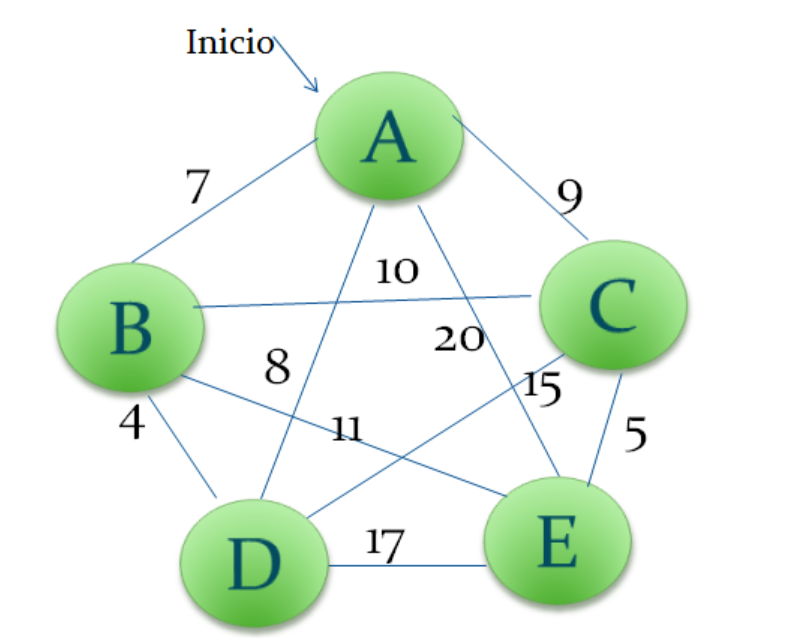

#Generar el archivo CSV, obtener el mejor recorrido usando algoritmos genéticos sin el uso de DEAP.

In [ ]:
import numpy as np
import random

from datetime import datetime

In [ ]:
n_cities = 5
n_population = 50
mutation_rate = 0.3

In [ ]:
# Generating a list of coordenades representing each city
names_list = np.array(['A','B','C','D','E'])
cities_dict = {'AB':7,'BA':7,'AC':9,'CA':9,'AD':8,'DA':8,'AE':20,'EA':20,'BC':10,'CB':10,'BD':4,'DB':4,'BE':11,'EB':11,'CD':15,'DC':15,'CE':5,'EC':15,'DE':17,'ED':17}

# Function to compute the distance between two points

def compute_city_distance_names(city_a, city_b, cities_dict):
    return cities_dict.get(city_a+city_b)

cities_dict
#compute_city_distance_names('B','A', cities_dict)

{'AB': 7,
 'AC': 9,
 'AD': 8,
 'AE': 20,
 'BA': 7,
 'BC': 10,
 'BD': 4,
 'BE': 11,
 'CA': 9,
 'CB': 10,
 'CD': 15,
 'CE': 5,
 'DA': 8,
 'DB': 4,
 'DC': 15,
 'DE': 17,
 'EA': 20,
 'EB': 11,
 'EC': 15,
 'ED': 17}

In [ ]:
def genesis(city_list, n_population):

    population_set = []
    for i in range(n_population):
        #Randomly generating a new solution
        sol_i = city_list[np.random.choice(list(range(n_cities)), n_cities, replace=False)]
        population_set.append(sol_i)
    return np.array(population_set)

population_set = genesis(names_list, n_population)
population_set

array([['A', 'C', 'E', 'B', 'D'],
       ['A', 'B', 'D', 'E', 'C'],
       ['A', 'D', 'E', 'B', 'C'],
       ['C', 'D', 'B', 'E', 'A'],
       ['B', 'A', 'C', 'E', 'D'],
       ['E', 'A', 'C', 'B', 'D'],
       ['D', 'B', 'C', 'A', 'E'],
       ['B', 'C', 'A', 'E', 'D'],
       ['D', 'A', 'C', 'B', 'E'],
       ['D', 'A', 'C', 'B', 'E'],
       ['D', 'E', 'C', 'B', 'A'],
       ['A', 'D', 'B', 'C', 'E'],
       ['D', 'B', 'E', 'A', 'C'],
       ['C', 'D', 'A', 'E', 'B'],
       ['C', 'D', 'B', 'E', 'A'],
       ['A', 'D', 'C', 'E', 'B'],
       ['E', 'C', 'A', 'D', 'B'],
       ['C', 'E', 'B', 'D', 'A'],
       ['C', 'D', 'E', 'A', 'B'],
       ['C', 'B', 'A', 'E', 'D'],
       ['E', 'D', 'C', 'A', 'B'],
       ['A', 'D', 'E', 'C', 'B'],
       ['D', 'C', 'A', 'B', 'E'],
       ['B', 'D', 'A', 'C', 'E'],
       ['C', 'D', 'A', 'E', 'B'],
       ['E', 'C', 'B', 'A', 'D'],
       ['A', 'D', 'B', 'E', 'C'],
       ['C', 'B', 'D', 'A', 'E'],
       ['E', 'C', 'A', 'D', 'B'],
       ['A', '

In [ ]:
def fitness_eval(city_list, cities_dict):
    total = 0
    for i in range(n_cities-1):
        a = city_list[i]
        b = city_list[i+1]
        total += compute_city_distance_names(a,b, cities_dict)
    return total

In [ ]:
def get_all_fitnes(population_set, cities_dict):
    fitnes_list = np.zeros(n_population)

    #Looping over all solutions computing the fitness for each solution
    for i in  range(n_population):
        fitnes_list[i] = fitness_eval(population_set[i], cities_dict)

    return fitnes_list

fitnes_list = get_all_fitnes(population_set,cities_dict)
fitnes_list

array([29., 43., 46., 50., 38., 43., 43., 56., 38., 38., 49., 27., 44.,
       54., 50., 39., 36., 28., 59., 54., 48., 50., 42., 26., 54., 40.,
       38., 42., 36., 52., 36., 36., 44., 44., 56., 50., 62., 38., 51.,
       42., 49., 51., 45., 54., 29., 38., 42., 48., 49., 37.])

In [ ]:
def progenitor_selection(population_set,fitnes_list):
    total_fit = fitnes_list.sum()
    prob_list = fitnes_list/total_fit
    
    #Notice there is the chance that a progenitor. mates with oneself
    progenitor_list_a = np.random.choice(list(range(len(population_set))), len(population_set),p=prob_list, replace=True)
    progenitor_list_b = np.random.choice(list(range(len(population_set))), len(population_set),p=prob_list, replace=True)
    
    progenitor_list_a = population_set[progenitor_list_a]
    progenitor_list_b = population_set[progenitor_list_b]
    
    
    return np.array([progenitor_list_a,progenitor_list_b])


progenitor_list = progenitor_selection(population_set,fitnes_list)
progenitor_list[0][2]

array(['A', 'E', 'D', 'B', 'C'], dtype='<U1')

In [ ]:
def mate_progenitors(prog_a, prog_b):
    offspring = prog_a[0:5]

    for city in prog_b:

        if not city in offspring:
            offspring = np.concatenate((offspring,[city]))

    return offspring
            
    
    
def mate_population(progenitor_list):
    new_population_set = []
    for i in range(progenitor_list.shape[1]):
        prog_a, prog_b = progenitor_list[0][i], progenitor_list[1][i]
        offspring = mate_progenitors(prog_a, prog_b)
        new_population_set.append(offspring)
        
    return new_population_set

new_population_set = mate_population(progenitor_list)
new_population_set[0]

array(['E', 'D', 'C', 'A', 'B'], dtype='<U1')

In [ ]:
def mutate_offspring(offspring):
    for q in range(int(n_cities*mutation_rate)):
        a = np.random.randint(0,n_cities)
        b = np.random.randint(0,n_cities)

        offspring[a], offspring[b] = offspring[b], offspring[a]

    return offspring
    
    
def mutate_population(new_population_set):
    mutated_pop = []
    for offspring in new_population_set:
        mutated_pop.append(mutate_offspring(offspring))
    return mutated_pop

mutated_pop = mutate_population(new_population_set)
mutated_pop[0]

array(['B', 'D', 'C', 'A', 'E'], dtype='<U1')

In [ ]:
best_solution = [-1,np.inf,np.array([])]
for i in range(10000):
    if i%100==0: print(i, fitnes_list.min(), fitnes_list.mean(), datetime.now().strftime("%d/%m/%y %H:%M"))
    fitnes_list = get_all_fitnes(mutated_pop,cities_dict)
    
    #Saving the best solution
    if fitnes_list.min() < best_solution[1]:
        best_solution[0] = i
        best_solution[1] = fitnes_list.min()
        best_solution[2] = np.array(mutated_pop)[fitnes_list.min() == fitnes_list]
    
    progenitor_list = progenitor_selection(population_set,fitnes_list)
    new_population_set = mate_population(progenitor_list)
    
    mutated_pop = mutate_population(new_population_set)

0 26.0 43.86 06/06/22 23:26
100 25.0 44.6 06/06/22 23:26
200 27.0 43.84 06/06/22 23:26
300 28.0 44.36 06/06/22 23:26
400 25.0 45.64 06/06/22 23:26
500 25.0 42.96 06/06/22 23:26
600 26.0 43.08 06/06/22 23:26
700 25.0 43.8 06/06/22 23:26
800 25.0 42.3 06/06/22 23:26
900 26.0 45.88 06/06/22 23:26
1000 30.0 43.36 06/06/22 23:26
1100 26.0 44.84 06/06/22 23:26
1200 27.0 44.86 06/06/22 23:26
1300 30.0 44.76 06/06/22 23:26
1400 26.0 43.92 06/06/22 23:26
1500 32.0 44.02 06/06/22 23:26
1600 29.0 44.32 06/06/22 23:26
1700 25.0 44.1 06/06/22 23:26
1800 25.0 44.08 06/06/22 23:26
1900 29.0 44.04 06/06/22 23:26
2000 32.0 43.98 06/06/22 23:26
2100 25.0 43.88 06/06/22 23:26
2200 26.0 44.08 06/06/22 23:26
2300 27.0 43.62 06/06/22 23:26
2400 25.0 43.8 06/06/22 23:26
2500 26.0 46.12 06/06/22 23:26
2600 28.0 43.42 06/06/22 23:26
2700 27.0 43.22 06/06/22 23:26
2800 28.0 45.68 06/06/22 23:26
2900 29.0 43.56 06/06/22 23:26
3000 32.0 46.86 06/06/22 23:26
3100 25.0 43.96 06/06/22 23:26
3200 25.0 43.48 06/06/22 

In [ ]:
best_solution

[8, 25.0, array([['D', 'B', 'A', 'C', 'E']], dtype='<U1')]

*Guardando en un CSV*

In [ ]:
import csv
fields = ['Puntos', 'Total', 'Orden', 'Fecha']  
rows=[]
for i in range(10000):
    if i%100==0:
      rows =np.concatenate(i, fitnes_list.min(), fitnes_list.mean())
      fitnes_list = get_all_fitnes(mutated_pop,cities_dict)
    

  
      with open('GFG', 'w') as f: 
            
          
          write = csv.writer(f)  
          write.writerow(fields) 
          write.writerows(rows)

# 4. Con el uso de DEAP, resolver el anterior ejercicio.

In [38]:
import random

In [29]:
!pip install deap
from deap import base
from deap import creator
from deap import tools
from deap import algorithms

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [31]:
import numpy as np


In [42]:
toolbox= base.Toolbox()
n=5
creator.create('FitnnesMin',base.Fitness,weights=(-1,0,))
creator.create('EstrIndividuo',list,fitness = creator.FitnessMin)
toolbox.register('Genes',np.random.permutation,n)
toolbox.register('Individuos',tools.initIterate,creator.EstrIndividuo,toolbox.Genes)

/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnnesMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'EstrIndividuo' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


In [43]:
toolbox.register('Poblacion',tools.initRepeat,list,toolbox.Individuos)

In [44]:
pop=toolbox.Poblacion(n=10)

In [56]:
toolbox.register('mate',tools.cxPartialyMatched)
toolbox.register('mutate',tools.mutShuffleIndexes,indpb=0.1)
toolbox.register('select',tools.selTournament,tournsize=2)

In [46]:
dist=[[0,7,9,8,20],
      [7,0,10,4,11],
      [9,10,0,11,5],
      [8,4,11,0,17],
      [20,11,5,17,0]]

In [49]:
def apditao(individuo):
  f=0
  for i in range(n-1):
    local1=individuo[i]
    local2=individuo[i+1]
    distancia= dist[local1][local2]
    f=f+distancia
  return f,

In [51]:
toolbox.register('evaluate',apditao)

In [52]:
def estatisticaSalvar(individuo):
  return individuo.fitness.values

In [53]:
estadistica=tools.Statistics(estatisticaSalvar)
estadistica.register('mean',np.mean)
estadistica.register('min',np.min)
estadistica.register('max',np.max)

In [54]:
hof=tools.HallOfFame(1)

In [57]:
result, log =algorithms.eaSimple(pop,
                                 toolbox,
                                 cxpb=0.8,
                                 mutpb=0.1,
                                 stats= estadistica,
                                 ngen=30,
                                 halloffame=hof,
                                 verbose=True)

gen	nevals	mean	min	max
0  	0     	37.8	27 	44 
1  	8     	37.3	30 	48 
2  	7     	37.9	29 	51 
3  	8     	34.3	25 	47 
4  	6     	33.4	25 	56 
5  	7     	36  	25 	56 
6  	8     	27.6	25 	46 
7  	8     	25  	25 	25 
8  	8     	25  	25 	25 
9  	7     	25  	25 	25 
10 	5     	25  	25 	25 
11 	8     	25.5	25 	30 
12 	8     	25.4	25 	29 
13 	8     	25  	25 	25 
14 	8     	25  	25 	25 
15 	4     	25  	25 	25 
16 	10    	25  	25 	25 
17 	9     	25  	25 	25 
18 	10    	25  	25 	25 
19 	8     	25  	25 	25 
20 	10    	25  	25 	25 
21 	8     	26.3	25 	38 
22 	10    	27.3	25 	48 
23 	6     	25  	25 	25 
24 	8     	25  	25 	25 
25 	10    	28.5	25 	43 
26 	10    	25  	25 	25 
27 	10    	25  	25 	25 
28 	2     	25  	25 	25 
29 	8     	25  	25 	25 
30 	10    	26.3	25 	38 


In [58]:
print(result)

[[3, 1, 0, 2, 4], [3, 1, 0, 2, 4], [3, 1, 0, 2, 4], [3, 1, 0, 2, 4], [3, 1, 0, 2, 4], [3, 1, 0, 2, 4], [3, 1, 0, 2, 4], [3, 1, 0, 2, 4], [3, 1, 0, 2, 4], [4, 1, 0, 2, 3]]


In [59]:
print(hof)

[[3, 1, 0, 2, 4]]


#5. Generar un agente inteligente que diferencia dos cadenas de caracteres.

In [ ]:
import difflib
import re

def tokenize(s):
    return re.split('\s+', s)
def untokenize(ts):
    return ' '.join(ts)
        
def equalize(s1, s2):
    l1 = tokenize(s1)
    l2 = tokenize(s2)
    res1 = []
    res2 = []
    prev = difflib.Match(0,0,0)
    for match in difflib.SequenceMatcher(a=l1, b=l2).get_matching_blocks():
        if (prev.a + prev.size != match.a):
            for i in range(prev.a + prev.size, match.a):
                res2 += ['_' * len(l1[i])]
            res1 += l1[prev.a + prev.size:match.a]
        if (prev.b + prev.size != match.b):
            for i in range(prev.b + prev.size, match.b):
                res1 += ['_' * len(l2[i])]
            res2 += l2[prev.b + prev.size:match.b]
        res1 += l1[match.a:match.a+match.size]
        res2 += l2[match.b:match.b+match.size]
        prev = match
    return untokenize(res1), untokenize(res2)

def insert_newlines(string, every=64, window=10):
    result = []
    from_string = string
    while len(from_string) > 0:
        cut_off = every
        if len(from_string) > every:
            while (from_string[cut_off-1] != ' ') and (cut_off > (every-window)):
                cut_off -= 1
        else:
            cut_off = len(from_string)
        part = from_string[:cut_off]
        result += [part]
        from_string = from_string[cut_off:]
    return result

def show_comparison(s1, s2, width=40, margin=10, sidebyside=True, compact=False):
    s1, s2 = equalize(s1,s2)

    if sidebyside:
        s1 = insert_newlines(s1, width, margin)
        s2 = insert_newlines(s2, width, margin)
        if compact:
            for i in range(0, len(s1)):
                lft = re.sub(' +', ' ', s1[i].replace('_', '')).ljust(width)
                rgt = re.sub(' +', ' ', s2[i].replace('_', '')).ljust(width) 
                print(lft + ' | ' + rgt + ' | ')        
        else:
            for i in range(0, len(s1)):
                lft = s1[i].ljust(width)
                rgt = s2[i].ljust(width)
                print(lft + ' | ' + rgt + ' | ')
    else:
        print(s1)
        print(s2)

In [ ]:
s1 = "hace calor. es verano. hay buen clima. deberiamos comer helados"
s2 = "no hace calor. es invierno. hay mal clima. no deberiamos comer helados"
print(s1)
print(s2)
print()
print('Comparacion lado a lado ')
print('-------------------------------------------------------------------------------------')
show_comparison(s1, s2, width=40, sidebyside=True, compact=False)
print()
print('Lado a lado ')
print('-------------------------------------------------------------------------------------')
show_comparison(s1, s2, width=40, sidebyside=True, compact=True)
print()
print('Comparacion arriba y abajo')
print('-------------------------------------------------------------------------------------')
show_comparison(s1, s2, sidebyside=False)

hace calor. es verano. hay buen clima. deberiamos comer helados
no hace calor. es invierno. hay mal clima. no deberiamos comer helados

Comparacion lado a lado 
-------------------------------------------------------------------------------------
__ hace calor. es verano. _________ hay  | no hace calor. es _______ invierno. hay  | 
buen ___ clima. __ deberiamos comer      | ____ mal clima. no deberiamos comer      | 
helados                                  | helados                                  | 

Lado a lado 
-------------------------------------------------------------------------------------
 hace calor. es verano. hay              | no hace calor. es invierno. hay          | 
buen clima. deberiamos comer             |  mal clima. no deberiamos comer          | 
helados                                  | helados                                  | 

Comparacion arriba y abajo
-------------------------------------------------------------------------------------
__ hace calor. es